<a href="https://colab.research.google.com/github/berndheidemann/notebooks_fastai/blob/master/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.tabular import * 
from fastai.imports import *

In [2]:
!gdown https://drive.google.com/uc?id=1Jx-n-46S4yGaqOH6RpLM6I0INRv9rOJC

Downloading...
From: https://drive.google.com/uc?id=1Jx-n-46S4yGaqOH6RpLM6I0INRv9rOJC
To: /content/house-prices-advanced-regression-techniques.zip
100% 196k/196k [00:00<00:00, 58.4MB/s]


In [3]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: sample_submission.csv   
  inflating: data_description.txt    
  inflating: test.csv                
  inflating: train.csv               


In [0]:
df_train=pd.read_csv("./train.csv")

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [13]:
df_train.sample(20).transpose()

,201,1252,659,173,1327,365,889,1,1388,868,1449,1212,412,816,1407,470,210,1201,1026,987
Id,202,1253,660,174,1328,366,890,2,1389,869,1450,1213,413,817,1408,471,211,1202,1027,988
MSSubClass,20,20,20,20,20,70,20,20,20,60,180,30,20,20,20,120,30,60,20,20
MSZoning,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL,RL,RL
LotFrontage,75,62,75,80,60,59,128,80,42,NaN,21,50,NaN,NaN,NaN,NaN,67,80,73,83
LotArea,10125,9858,9937,10197,6600,10690,12160,9600,14892,14762,1533,9340,4403,11425,8780,6820,5604,10400,9300,10159
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,IR1,Reg,Reg,Reg,Reg,IR1,IR2,Reg,Reg,IR2,IR1,IR1,IR1,Reg,Reg,Reg,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [0]:
df_test=pd.read_csv("./test.csv")

In [0]:
path="./"
dep_var = 'SalePrice'

In [0]:
cat_names=['LandContour', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath', 'GarageType', 'GarageFinish', 'KitchenQual', 'FireplaceQu', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'CentralAir', 'Exterior1st', 'Exterior2nd', 'YrSold', 'HouseStyle', 'MoSold', 'MiscFeature', 'PoolQC', 'Fence', 'GarageQual', 'SaleType', 'SaleCondition']
cont_names=['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'BedroomAbvGr', 'TotalBsmtSF' , 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [0]:
test_na_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea' ]
for col in test_na_cols:
  df_test[col] = df_test[col].fillna(0)

In [0]:
procs = [FillMissing, Categorify, Normalize]
df_test["SalePrice"]=0
df_test.SalePrice.astype("float")
test = TabularList.from_df(df_test,  cat_names=cat_names, cont_names=cont_names, procs=procs)

In [0]:

data = (TabularList.from_df(df_train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.2)
                           .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                           .add_test(test, label=0)
                           .databunch())

In [0]:
learn = tabular_learner(data, layers=[300, 100], metrics=root_mean_squared_error)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


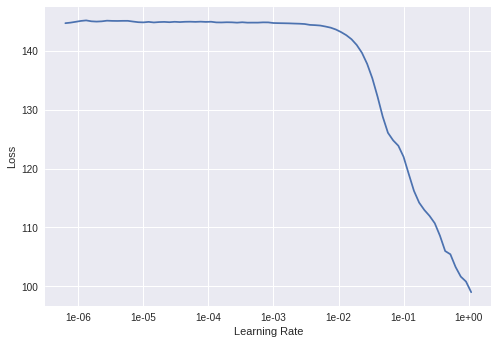

In [29]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(10, 1e-1)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,126.934349,60.485714,7.776981,00:00
1,63.453373,14.197192,3.767387,00:00
2,35.725620,1.553038,1.244799,00:00
3,21.623203,0.044118,0.207576,00:00
4,13.769628,0.043531,0.207522,00:00
5,9.054023,0.029590,0.171293,00:00
6,6.069759,0.027225,0.163404,00:00
7,4.120655,0.025458,0.155838,00:00
8,2.820920,0.021198,0.143322,00:00
9,1.942392,0.021241,0.144674,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


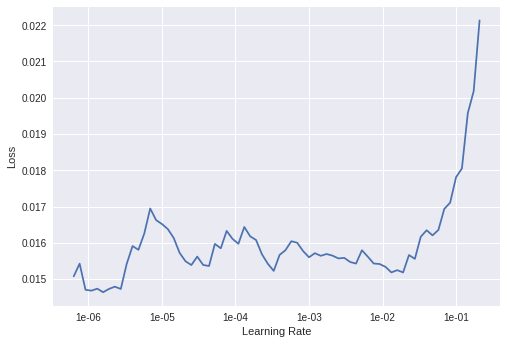

In [35]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save("stage-1")

In [37]:
learn.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.018497,0.021293,0.144704,00:00
1,0.016255,0.020355,0.141420,00:00
2,0.016077,0.019930,0.140129,00:00
3,0.017045,0.020090,0.140508,00:00
4,0.016193,0.019595,0.138816,00:00
5,0.015940,0.020019,0.140258,00:00
6,0.015712,0.019647,0.139020,00:00
7,0.015780,0.020211,0.140989,00:00
8,0.015916,0.020176,0.140982,00:00
9,0.016007,0.020032,0.140506,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


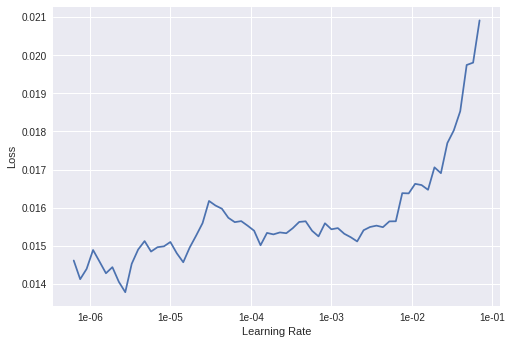

In [42]:
learn.lr_find()
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(10, 1e-6)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.017136,0.018542,0.135118,00:00
1,0.015490,0.018307,0.134386,00:00
2,0.014974,0.018392,0.134574,00:00
3,0.015989,0.018220,0.133939,00:00
4,0.015118,0.018258,0.134207,00:00
5,0.014993,0.018109,0.133544,00:00
6,0.014987,0.018288,0.134226,00:00
7,0.016022,0.018303,0.134277,00:00
8,0.015316,0.018547,0.135144,00:00
9,0.014902,0.018651,0.135567,00:00


In [0]:
learn.save("stage-2")

In [46]:
#learn.load("stage-1")

learn.validate()

[0.018650629, tensor(0.1356)]

In [0]:
predictions, y = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
prices=predictions

In [0]:
prices=np.exp(np.squeeze(predictions))

In [68]:
prices[:5]

tensor([126693.2500, 155564.0781, 183288.4375, 197687.8750, 174333.8594])

In [0]:
res_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': prices})
res_df.to_csv('houses_submission.csv', index=False)

In [70]:
!cat houses_submission.csv

Id,SalePrice
1461,126693.25
1462,155564.08
1463,183288.44
1464,197687.88
1465,174333.86
1466,164141.92
1467,178727.47
1468,165183.84
1469,186141.08
1470,128200.0
1471,178376.02
1472,107378.78
1473,103311.46
1474,149121.77
1475,111792.33
1476,367448.94
1477,245977.97
1478,270443.7
1479,277462.9
1480,439819.47
1481,312533.16
1482,197252.28
1483,168515.39
1484,164724.34
1485,181605.4
1486,191684.61
1487,305235.7
1488,251877.7
1489,193446.67
1490,240612.84
1491,192203.38
1492,80282.914
1493,165581.16
1494,304402.84
1495,283543.12
1496,230665.61
1497,160867.53
1498,155160.48
1499,170973.84
1500,169630.38
1501,163368.89
1502,169436.19
1503,277777.44
1504,262976.84
1505,244508.02
1506,180955.19
1507,234514.45
1508,196118.97
1509,146515.42
1510,145647.36
1511,151270.45
1512,166759.06
1513,141441.31
1514,131935.27
1515,181715.23
1516,156153.73
1517,165250.19
1518,131821.58
1519,204693.31
1520,136063.78
1521,142091.2
1522,163886.66
1523,111588.77
1524,120118.47
1525,124465.74
1526,112434.7
1527,